<div style="border:2px solid black; padding:10px;">
    <h3>Nhóm 15</h3>
    <h1 style='color:red;text-align:center;font-size:30px'>Chủ đề: Phân tích về doanh thu phim<b></b></h1>
</div>


<h3>Danh sách thành viên</h3>
<li> Nguyễn Quốc Hưng - 21120464 </li>
<li> Đoàn Đức Hữu - 21120465 </li>
<li> Võ Minh Khuê - 21120486</li>
<li> Hồ Trọng Lễ - 21120494</li>


<h1 style='color:blue;text-align:center;font-size:30px'><b>Phần I - B. Khám phá - Tiền xử xử lý dữ liệu </b></h1>


# Import thư viện


In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import os
import re
import statistics
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [106]:
import sys
sys.executable

'c:\\Users\\dhuu2\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

### Đọc file 'boxoffice2000_2022.csv' vào dataframe df


In [107]:
df = pd.read_csv(
    './boxoffice_crawler/boxoffice_crawler/boxoffice2000_2022.csv', encoding='latin1')
df.head(20)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,in_release,release_date
0,Driven,"$32,720,065","$54,744,738",Warner Bros.,"$12,174,504","2,905","$94,000,000",PG-13,"Action,Drama,Sport",249,27/04/2001
1,What's the Worst That Could Happen?,"$32,269,834","$38,464,131",Metro-Goldwyn-Mayer (MGM),"$13,049,114","2,675","$60,000,000",PG-13,"Comedy,Crime",214,01/06/2001
2,Supercross,"$3,102,550","$3,344,431",Twentieth Century Fox,"$1,330,520","1,621",NaN,PG-13,"Action,Drama,Romance,Sport",137,17/08/2005
3,Land of the Lost,"$49,438,370","$68,777,554",Universal Pictures,"$18,837,350","3,521","$100,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",210,05/06/2009
4,Slackers,"$5,285,941","$6,413,915",Sony Pictures Entertainment (SPE),"$2,785,283","1,893","$14,000,000",R,"Comedy,Romance",334,01/02/2002
5,The Libertine,"$4,835,065","$10,852,064",The Weinstein Company,"$27,804",2,NaN,R,"Biography,Drama,History,Romance",402,NaN
6,Madagascar: Escape 2 Africa,"$180,010,950","$603,900,354",DreamWorks,"$63,106,589","4,056","$150,000,000",PG,"Adventure,Animation,Comedy,Family",420,07/11/2008
7,Flipped,"$1,755,212","$1,755,212",Warner Bros.,"$224,233",45,"$14,000,000",PG,"Comedy,Drama,Romance",148,06/08/2010
8,Mansfield Park,"$4,775,847","$4,775,847",Miramax,"$85,608",8,NaN,PG-13,"Comedy,Drama,Romance",409,19/11/1999
9,The Dark Knight,"$533,345,358","$1,003,845,358",Warner Bros.,"$158,411,483","4,366","$185,000,000",PG-13,"Action,Crime,Drama,Thriller",532,18/07/2008


## Khám phá dữ liệu


### Kiểm tra số dòng và số cột của dữ liệu


In [108]:
num_rows = df.shape[0]
num_cols = df.shape[1]
shape = (num_rows, num_cols)
shape

(4552, 11)

### Kiểu dữ liệu của các cột


In [109]:
df.dtypes

title               object
domestic_revenue    object
world_revenue       object
distributor         object
opening_revenue     object
opening_theaters    object
budget              object
MPAA                object
genres              object
in_release          object
release_date        object
dtype: object

### Ý nghĩa của các cột


In [118]:
schema_data = pd.read_csv(
    "./boxoffice_crawler/boxoffice_crawler/MovieRevenue_schema.csv", encoding='utf-8')
pd.set_option('max_colwidth', 400)
schema_data


,STT,name,meaning
0,1,title,Tựa đề phim
1,2,domestic_revenue,Doanh thu trong nước (USA)
2,3,world_revenue,Doanh thu toàn cầu
3,4,distributor,Nhà phân phối
4,5,opening_revenue,"Doanh thu mở màn, hay còn được gọi là doanh thu đạt được trong tuần đầu tiên"
5,6,opening_theater,Số lượng rạp mà bộ phim được chiếu trong được chiếu trong tuần đầu tiên
6,7,budget,Ngân sách dùng để sản xuất bộ phim
7,8,MPPA,Chỉ số đánh giá cảu Hiệp Hội điện ảnh Hoa Kỳ
8,10,in_release,Số ngày bộ phim được phát hành
9,11,release_date,Ngày phát hành


## Tiền xử lý

1. **Chuyển đổi các cột chứa số thành kiểu dữ liệu số**: Các cột như `domestic_revenue`, `world_revenue`, `opening_revenue`, `opening_theaters`, `budget`, và `in_release` đều chứa dữ liệu số, nhưng hiện đang được lưu trữ dưới dạng object. Chúng ta sẽ loại bỏ các ký tự không phải số (như dấu `$` và dấu phẩy) và chuyển đổi các cột này thành kiểu dữ liệu số.

2. **Chuyển đổi cột `release_date` thành kiểu dữ liệu datetime**: Điều này sẽ hữu ích cho việc phân tích sau này.


In [111]:
# Remove $ and , in the revenue and budget columns
for col in ['domestic_revenue', 'world_revenue', 'opening_revenue', 'budget']:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)

# Convert columns to numeric type
for col in ['domestic_revenue', 'world_revenue', 'opening_revenue', 'opening_theaters', 'budget', 'in_release']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')

In [112]:
df.dtypes

title                       object
domestic_revenue             int64
world_revenue                int64
distributor                 object
opening_revenue            float64
opening_theaters           float64
budget                     float64
MPAA                        object
genres                      object
in_release                 float64
release_date        datetime64[ns]
dtype: object

## Quay lại bước khám phá dữ liệu


Với các cột có kiểu dữ liệu số, ta cần tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Sau đó lưu kết quả vào DataFrame `num_col_info_df`, trong đó:

- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.


In [113]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate statistics
missing_ratio = df[numeric_cols].isnull().mean() * 100
min_values = df[numeric_cols].min()
lower_quartile = df[numeric_cols].quantile(0.25)
median = df[numeric_cols].median()
upper_quartile = df[numeric_cols].quantile(0.75)
max_values = df[numeric_cols].max()

# Create DataFrame
num_col_info_df = pd.DataFrame({
    'missing_ratio': missing_ratio,
    'min': min_values,
    'lower_quartile': lower_quartile,
    'median': median,
    'upper_quartile': upper_quartile,
    'max': max_values
})

# Round to 1 decimal place
num_col_info_df = num_col_info_df.round(1)

num_col_info_df

,missing_ratio,min,lower_quartile,median,upper_quartile,max
domestic_revenue,0.0,153504.0,9047524.8,29105705.0,67363237.0,9.366622e+08
world_revenue,0.0,153504.0,17527278.2,54004950.0,150824326.8,2.799439e+09
opening_revenue,1.0,3366.0,1060459.0,8015590.0,19104303.0,3.571150e+08
opening_theaters,69.6,1.0,4.0,15.0,264.5,9.980000e+02
budget,39.1,15000.0,20000000.0,38000000.0,76000000.0,3.560000e+08
in_release,1.0,21.0,182.0,294.0,382.0,9.960000e+02


Với các cột "title","distributor","MPAA","genres" ta cần tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "genres"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu phẩy)
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu)

Lưu kết quả vào DataFrame `cat_col_info_df`, trong đó:

- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.


In [114]:
# Define categorical columns
cat_cols = ["title", "distributor", "MPAA", "genres"]

# Initialize DataFrame to store results
cat_col_info_df = pd.DataFrame(
    index=["missing_ratio", "num_values", "value_ratios"], columns=cat_cols)

for col in cat_cols:
    # Calculate missing ratio
    missing_ratio = df[col].isnull().mean() * 100

    # Calculate number of unique values
    # Split values by comma and flatten the list
    values = [val for sublist in df[col].dropna().str.split(',').tolist()
              for val in sublist]
    num_values = len(set(values))

    # Calculate value ratios
    value_counts = pd.Series(values).value_counts(normalize=True) * 100
    value_ratios = value_counts.sort_values(ascending=False).to_dict()

    # Store results
    cat_col_info_df.at["missing_ratio", col] = missing_ratio
    cat_col_info_df.at["num_values", col] = num_values
    cat_col_info_df.at["value_ratios", col] = value_ratios

# Round to 1 decimal place
cat_col_info_df = cat_col_info_df.applymap(
    lambda x: round(x, 1) if isinstance(x, (int, float)) else x)

cat_col_info_df

C:\Users\dhuu2\AppData\Local\Temp\ipykernel_1296\2806960657.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cat_col_info_df = cat_col_info_df.applymap(


,title,distributor,MPAA,genres
missing_ratio,0.0,0.0,6.6,0.1
num_values,4093,204,6,24
value_ratios,"{' Inc.': 0.1302365964836119, 'Hubble': 0.1302...","{'Warner Bros.': 11.379613356766257, 'Universa...","{'PG-13': 42.21176470588235, 'R': 39.270588235...","{'Drama': 15.98329796700664, 'Comedy': 12.4033..."


### Xử lý dữ liệu bị thiếu


- Tỷ lệ thiếu dữ liệu của từng cột


In [115]:
df.agg(lambda x: x.isna().mean()*100).sort_values(ascending=False)

opening_theaters    69.639719
budget              39.081722
release_date        10.413005
MPAA                 6.634446
opening_revenue      1.032513
in_release           0.966608
genres               0.131810
title                0.000000
domestic_revenue     0.000000
world_revenue        0.000000
distributor          0.000000
dtype: float64

In [116]:


# Drop the 'opening_theaters' and 'budget' columns
df = df.drop(['opening_theaters', 'budget'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Print the shape of the original and test DataFrames
print("Cleaned DataFrame shape:", df.shape)
df.shape
df.agg(lambda x: x.isna().mean()*100).sort_values(ascending=False)
df.dtypes

Cleaned DataFrame shape: (3758, 9)


title                       object
domestic_revenue             int64
world_revenue                int64
distributor                 object
opening_revenue            float64
MPAA                        object
genres                      object
in_release                 float64
release_date        datetime64[ns]
dtype: object

## Trực quan hóa và thống kê dữ liệu


c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


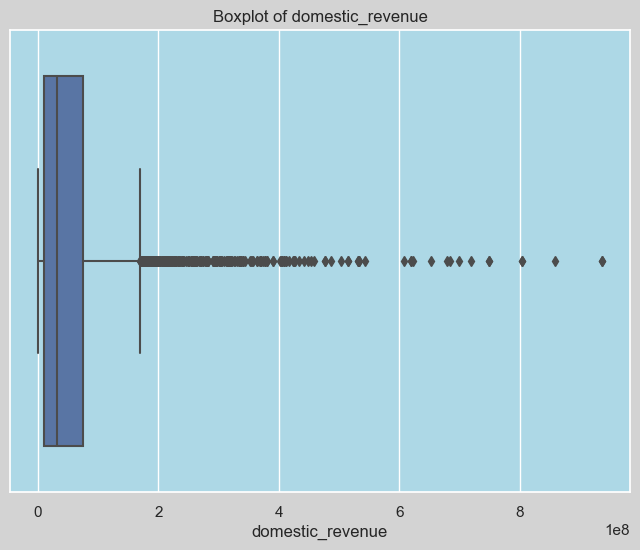

c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


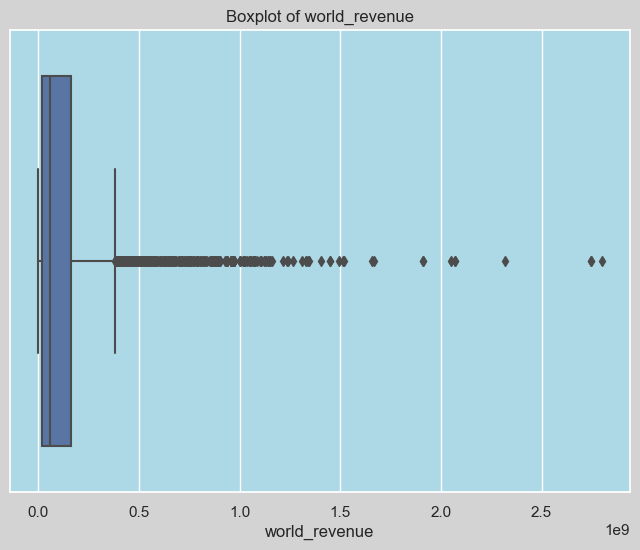

c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


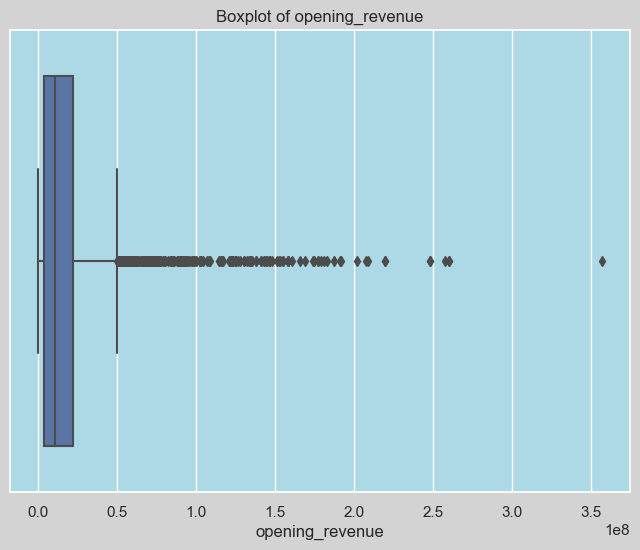

c:\Users\dhuu2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


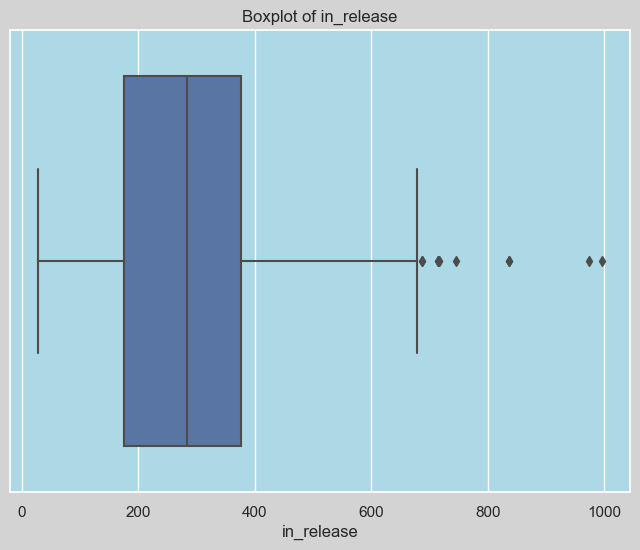


Basic Statistics for Categorical Columns:

Column: title
count               3758
unique              3404
top       Monsters, Inc.
freq                   5
Name: title, dtype: object

Column: distributor
count             3758
unique             154
top       Warner Bros.
freq               464
Name: distributor, dtype: object

Column: MPAA
count      3758
unique        6
top       PG-13
freq       1628
Name: MPAA, dtype: object

Column: genres
count                     3758
unique                     768
top       Comedy,Drama,Romance
freq                       175
Name: genres, dtype: object

Column: release_date
count                             3758
mean     2011-04-15 22:28:02.171367680
min                1999-08-06 00:00:00
25%                2005-08-12 00:00:00
50%                2011-02-18 00:00:00
75%                2016-12-09 00:00:00
max                2022-12-23 00:00:00
Name: release_date, dtype: object


In [117]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(
    include=['object', 'bool', 'datetime64[ns]']).columns

# Plot boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {col}')
    sns.boxplot(x=df[col])
    plt.show()

# Print basic statistics for categorical columns
print("\nBasic Statistics for Categorical Columns:")
for col in categorical_cols:
    print(f'\nColumn: {col}')
    print(df[col].describe())